<a href="https://colab.research.google.com/github/vivekdubey74vv/netfiz-movie-recommendation_question/blob/main/netfiz_movie_recommendation_question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
movies_df = pd.read_csv('/content/movies.csv')
ratings_df = pd.read_csv('/content/ratings.csv')
links_df = pd.read_csv('/content/links.csv')
tags_df = pd.read_csv('/content/tags.csv')

In [26]:

num_csv_files


4

In [27]:
movies_df.shape

(9742, 3)

In [28]:
ratings_df.shape

(100836, 4)

In [9]:
unique_user_ids = ratings_df['userId'].nunique()

print("Number of unique userId:", unique_user_ids)


Number of unique userId: 610


In [10]:

movie_ratings_count = ratings_df.groupby('movieId')['rating'].count()
max_ratings_movie_id = movie_ratings_count.idxmax()
movies_df = pd.read_csv('movies.csv')
max_ratings_movie_title = movies_df.loc[movies_df['movieId'] == max_ratings_movie_id, 'title'].values[0]

print("Movie with the maximum number of ratings:", max_ratings_movie_title)


Movie with the maximum number of ratings: Forrest Gump (1994)


In [11]:
matrix_movie_id = movies_df.loc[movies_df['title'] == 'Matrix, The (1999)', 'movieId'].values[0]
matrix_tags = tags_df.loc[tags_df['movieId'] == matrix_movie_id, 'tag']
print("Tags for Matrix, The (1999):")
print(matrix_tags)


Tags for Matrix, The (1999):
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


In [12]:
terminator2_movie_id = movies_df.loc[movies_df['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]
terminator2_ratings = ratings_df.loc[ratings_df['movieId'] == terminator2_movie_id, 'rating']average_rating = terminator2_ratings.mean()
print("Average rating for Terminator 2: Judgment Day (1991):", average_rating)


Average rating for Terminator 2: Judgment Day (1991): 3.970982142857143


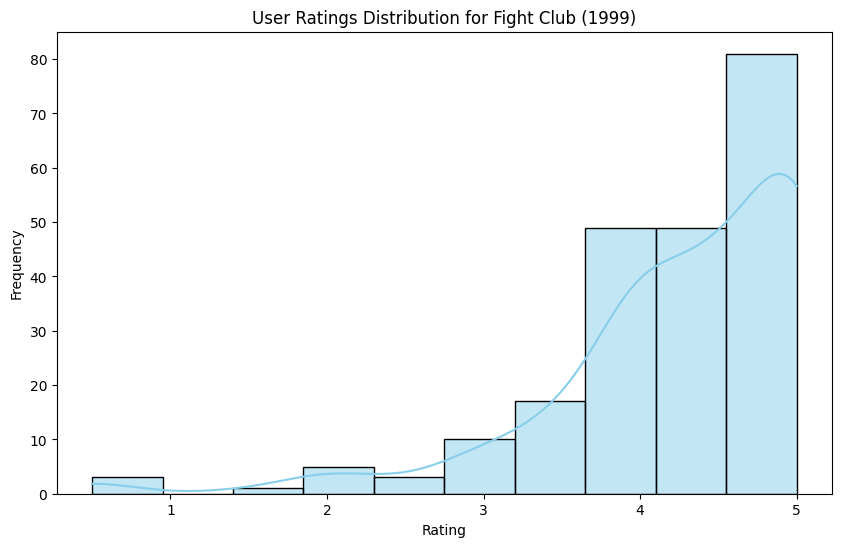

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fight_club_movie_id = movies_df.loc[movies_df['title'] == 'Fight Club (1999)', 'movieId'].values[0]
fight_club_ratings = ratings_df.loc[ratings_df['movieId'] == fight_club_movie_id, 'rating']
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, bins=10, kde=True, color='skyblue')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [14]:
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

grouped_ratings.columns = ['movieId', 'rating_count', 'average_rating']

movies_df = pd.read_csv('movies.csv')

merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['rating_count'] > 50]
most_popular_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax(), 'title']

print("Most popular movie based on average user ratings:", most_popular_movie)


Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


In [15]:
top_movies_by_ratings = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

movies_to_check = ["Pulp Fiction (1994)", "Bad Boys (1995)", "Silence of the Lambs, The (1991)", "Matrix, The (1999)"
correct_options = top_movies_by_ratings['title'].isin(movies_to_check)
print("Correct options:")
print(correct_options)


Correct options:
314     False
277     False
257      True
510      True
1938     True
Name: title, dtype: bool


In [17]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
top_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi_movie = top_sci_fi_movies.iloc[2]['title']

print("Third most popular Sci-Fi movie based on user ratings:", third_most_popular_sci_fi_movie)


Third most popular Sci-Fi movie based on user ratings: Jurassic Park (1993)
